In [72]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

### Step 1: Load Dataset

In [41]:
california = fetch_california_housing()
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [42]:
X = california.data
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [43]:
y = california.target
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

### Exploring the Data

In [44]:
df = pd.DataFrame(X, columns=california.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [45]:
df['MedHouseVal'] = y
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [46]:
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [47]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [48]:
df.drop('Latitude', axis=1, inplace=True)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,-122.25,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,-121.32,0.847


In [49]:
df.drop('Longitude', axis=1, inplace=True)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,0.847


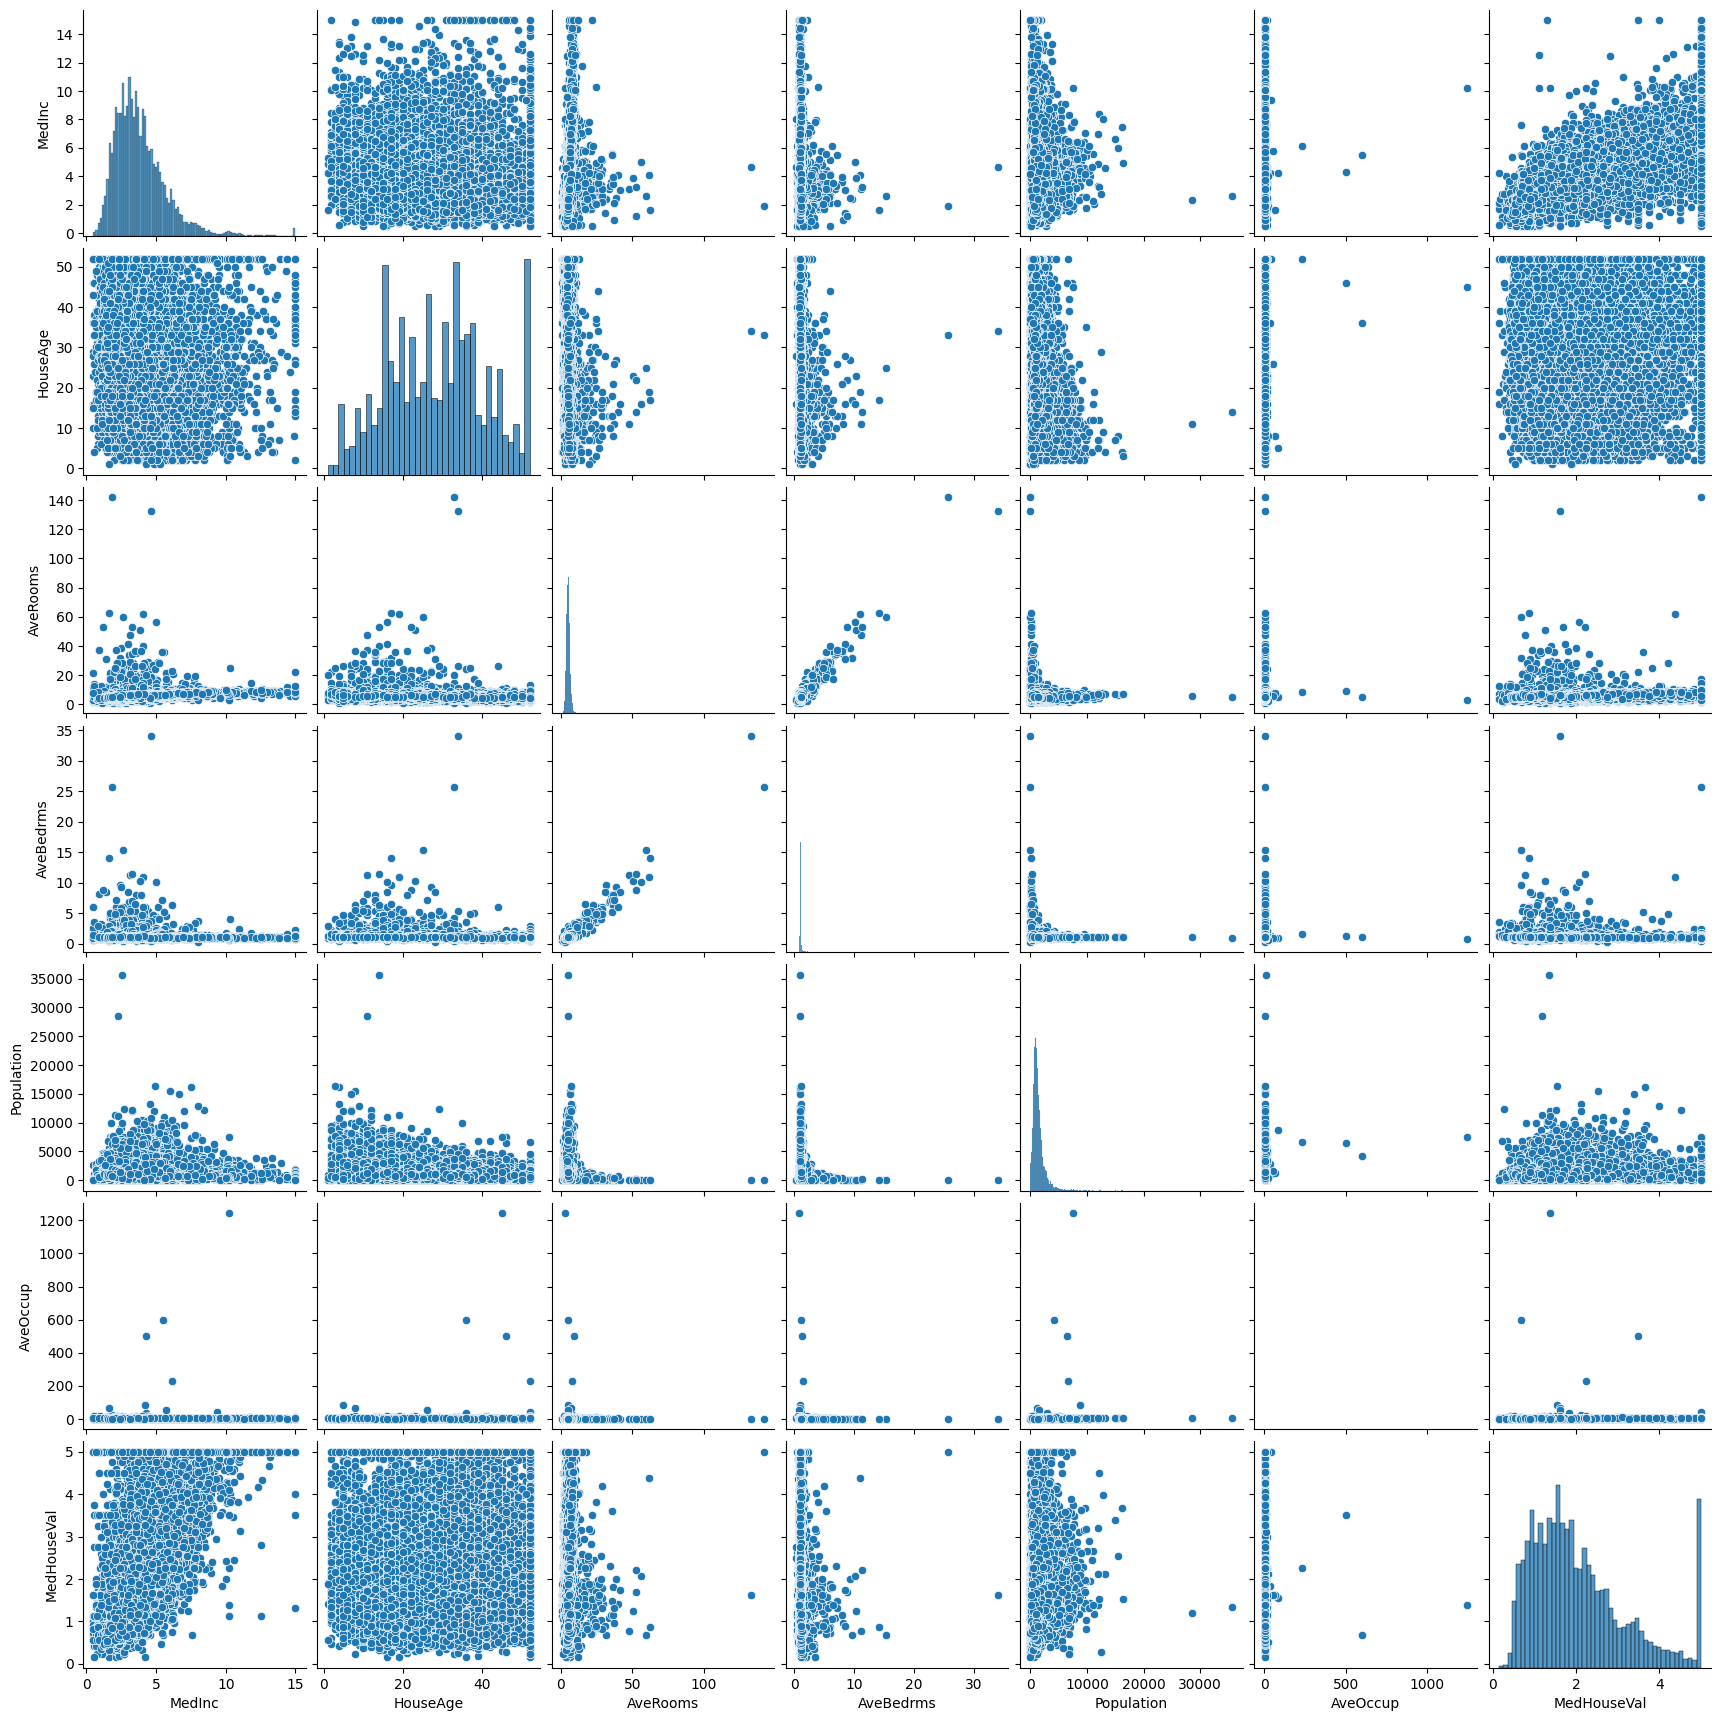

In [50]:
sns.pairplot(df)

### Training the Model

In [51]:
X = X[:, 0].reshape(-1, 1)
X

array([[8.3252],
       [8.3014],
       [7.2574],
       ...,
       [1.7   ],
       [1.8672],
       [2.3886]])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [53]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
model.coef_

array([0.41952462])

In [55]:
model.intercept_

np.float64(0.4492018141000391)

### Evaluating the Model

In [56]:
y_pred = model.predict(X_test)
y_pred

array([2.31004521, 1.91393007, 2.83315046, ..., 1.96624479, 3.25238141,
       2.04708718])

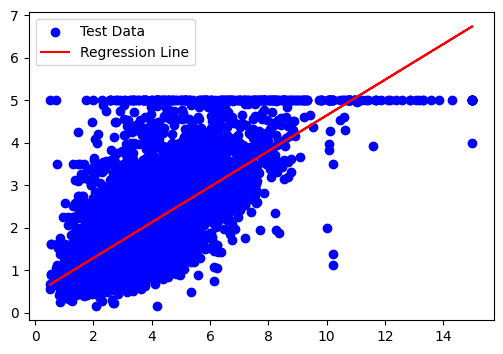

In [57]:
plt.figure(figsize=(6, 4))
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.legend()
plt.show()

In [58]:
r2_score(y_test, y_pred)

0.48152475221105784

In [59]:
mean_squared_error(y_test, y_pred)

np.float64(0.6702105632264884)

In [60]:
root_mean_squared_error(y_test, y_pred)

np.float64(0.8186638890451248)

In [69]:
X = df[['MedInc', 'AveRooms', 'AveBedrms']]
X

,MedInc,AveRooms,AveBedrms
0,8.3252,6.984127,1.023810
1,8.3014,6.238137,0.971880
2,7.2574,8.288136,1.073446
3,5.6431,5.817352,1.073059
4,3.8462,6.281853,1.081081
...,...,...,...
20635,1.5603,5.045455,1.133333
20636,2.5568,6.114035,1.315789
20637,1.7000,5.205543,1.120092
20638,1.8672,5.329513,1.171920


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [67]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [70]:
y_pred = model.predict(X_test)
y_pred

array([1.46143949, 3.03864439, 1.19293201, ..., 2.4508647 , 3.53976673,
       1.68771989])

In [71]:
r2_score(y_test, y_pred)

0.47769798845493583

### Polynomial Regression

In [73]:
degree = 3

In [74]:
poly_features = PolynomialFeatures(degree=degree, include_bias=False)

In [75]:
model = make_pipeline(poly_features, LinearRegression())
model

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linearregression', LinearRegression())])

In [76]:
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linearregression', LinearRegression())])

In [78]:
y_pred = model.predict(X_test)

In [80]:
r2_score(y_test, y_pred)

0.4895228976963477

In [85]:
poly_coefficients = model.named_steps['linearregression'].coef_
poly_coefficients

array([ 0.02578447, -0.2487853 ,  0.06828357,  0.13686343,  0.00190565,
       -0.00340322, -0.00984049, -0.0070868 ,  0.00073821])

In [86]:
poly_intercept = model.named_steps['linearregression'].intercept_
poly_intercept

np.float64(0.9976638028539351)

In [87]:
poly_features = model.named_steps['polynomialfeatures'].get_feature_names_out()
poly_features

array(['MedInc', 'AveBedrms', 'MedInc^2', 'MedInc AveBedrms',
       'AveBedrms^2', 'MedInc^3', 'MedInc^2 AveBedrms',
       'MedInc AveBedrms^2', 'AveBedrms^3'], dtype=object)

In [91]:
def polynomial_equation(coefficients, feature_names, intercept):
    terms = []
    for coef,feature in zip(coefficients, feature_names):
        if (coef != 0):
            terms.append(f"{coef:.3f} * {feature}")
    equation = " + ".join(terms)
    if intercept != 0:
        equation += f" + {intercept:.3f}"
    return equation

In [92]:
equation = polynomial_equation(poly_coefficients, poly_features, poly_intercept)
equation
# y = 'm1 * X1 + m2 * X2 + m3 * X1^2 + m4 * X1 X2 + m5 * X2^2 + m6 * X1^3 + m7 * X1^2 X2 + m8 * X1 X2^2 + m9 * X2^3' + c

'0.026 * MedInc + -0.249 * AveBedrms + 0.068 * MedInc^2 + 0.137 * MedInc AveBedrms + 0.002 * AveBedrms^2 + -0.003 * MedInc^3 + -0.010 * MedInc^2 AveBedrms + -0.007 * MedInc AveBedrms^2 + 0.001 * AveBedrms^3 + 0.998'